# Introduction to Scientific Programming with Python

## Session 4: NumPy, SciPy & matplotlib

## Outline:
* Overview/Review
* Basic plotting with Matplotlib
* NumPy arrays
  * Array object
  * Indexing & slicing
  * Useful functions
  * Broadcasting
* SciPy Overview
* Matplotlib Advanced Overview

## Review

So far we have talked about very generic programming constructs and about how they work in Python.

 * Writing programs in files & running them with the Python interpreter
 * Data types: Strings, lists, tuples dictionaries
 * Flow control: loops & conditionals
 * Structuring code: functions & classes

## Scientific Programming
 * What is scientific programming?
  * Analyze data from scientific experiments
  * “Number crunching”
  * Turning mathematical formulae into code
 * Aspects of scientific programming
  * Handling data: vectors, matrices & arrays
  * Visualizing data
  * Computing with arrays
  * Useful functions and algorithms

## NumPy, SciPy, matplotlib

* NumPy
  * its main object is a homogeneous n-dimensional array - very powerful
  * useful linear algebra, Fourier transform, and random number capabilities
  * See http://www.numpy.org
* SciPy
  * built ontop of NumPy
  * provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization 
  * See https://www.scipy.org
* matplotlib
  * flexible 2D plotting library
  * produces publication quality figures
  * See http://matplotlib.sourceforge.net/users/screenshots.html

## Importing numpy, scipy, and matplotlib

Start your notebook with **`%matplotlib inline`** - it enables the interactive plotting in your notebook or qtconsole:


In [80]:
%matplotlib inline

or use

`%matplotlib qt`

if you are using the qtconsole interface

### Get plotting tools and numpy

we need both plotting tools and numpy for this tutorial

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Statistical analysis on numerical data

Imagine we have performed an experiment to see how fast participants press a button after being shown a red light. The reaction times, in ms, are loaded in as a list:

In [3]:
reaction_times = [340.1, 402.1, 540.2, 256.2, 839.1, 350.4, 200.9, 632.4, 492.4, 495.2, 310.9]

We want to find the mean (average) reaction time, as well as the standard deviation, to put into our PhD thesis.

* Mean (average) reaction time: $$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$$
 
* Standard deviation of the reaction time: $$s = \sqrt{\frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})^2}$$

Using pure python, here is one way to do this:

In [4]:
from math import sqrt

# compute mean
sum_total = 0
for reaction_time in reaction_times:
    sum_total += reaction_time
mean_reaction_time = float(sum_total) / len(reaction_times)

# compute standard deviation
sum_squared_difference_from_mean = 0
for reaction_time in reaction_times:
    sum_squared_difference_from_mean += (reaction_time - mean_reaction_time) ** 2
std_reaction_time = sqrt(float(sum_squared_difference_from_mean) / (len(reaction_times) - 1))

print("Mean reaction time is ", mean_reaction_time)
print("Standard deviation of reaction times is ", std_reaction_time)

Mean reaction time is  441.80909090909097
Standard deviation of reaction times is  184.16244163534242


But this is:
- Slow to type!
- Slow to run! (on large datasets)
- Prone to errors
- Hard to read

Is there a better way? 

YES

Use **NumPy**

(**Num**erical **Py**thon)

In [5]:
import numpy as np

print("Mean reaction time is ", np.mean(reaction_times))
print("Standard deviation of reaction times is ", np.std(reaction_times))

Mean reaction time is  441.809090909
Standard deviation of reaction times is  175.591998443


We can run many different numpy functions on lists of numbers:

In [6]:
print("Maxmimum reaction time is ", np.max(reaction_times))
print("Minimum reaction time is ", np.min(reaction_times))
print("Median reaction time is ", np.median(reaction_times))
print("The subject with the maximum reaction time is ", np.argmax(reaction_times))
print("Variance of the reaction times is ", np.var(reaction_times))

Maxmimum reaction time is  839.1
Minimum reaction time is  200.9
Median reaction time is  402.1
The subject with the maximum reaction time is  4
Variance of the reaction times is  30832.5499174


## Numpy Arrays

So far we have been using number operations on **lists** of numbers, like so:

In [81]:
print(reaction_times)
print(np.mean(reaction_times))

[340.1, 402.1, 540.2, 256.2, 839.1, 350.4, 200.9, 632.4, 492.4, 495.2, 310.9]
441.809090909


We can get a lot more power out of numpy if we use a numpy **array** instead of a list:

In [82]:
reactions_np = np.array(reaction_times)
reactions_np.mean()

441.80909090909086

Here, we have converted the list to a numpy array. The numpy array contains the same information as the list, but we now get a lot more power. We can now do things like: 

In [9]:
# Array slicing - get an array of all the elements between index 3 and 6
reactions_np[3:6]

array([ 256.2,  839.1,  350.4])

In [10]:
# Comparisons - show which locations are above a certain threshold
reactions_np > 500

array([False, False,  True, False,  True, False, False,  True, False,
       False, False], dtype=bool)

In [11]:
# using the above code, index into the original array to get all the elements which are above the threshold:
reactions_np[reactions_np > 500]

array([ 540.2,  839.1,  632.4])

In [12]:
# Mathematical operations - apply mathematics to all elements in the array at once
reactions_in_seconds = reactions_np / 1000.0

reactions_in_seconds

array([ 0.3401,  0.4021,  0.5402,  0.2562,  0.8391,  0.3504,  0.2009,
        0.6324,  0.4924,  0.4952,  0.3109])

## Basic Plotting

 * Basic line and scatter plots can be created using the *plot* function from the *pylab* package
 * if only one array is given, matplotlib assumes the index as x-axis

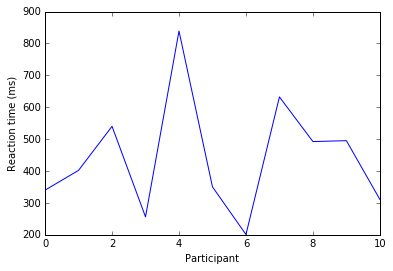

In [14]:
plt.plot(reactions_np)
plt.xlabel('Participant')
plt.ylabel('Reaction time (ms)')

For this sort of data, a summary plot might be more useful, such as a histogram or a boxplot:

(0, 939.10000000000002)

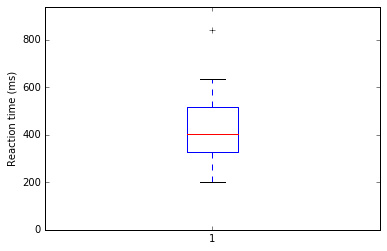

In [15]:
plt.boxplot(reactions_np);
plt.ylabel('Reaction time (ms)')
plt.ylim(0, reactions_np.max() + 100)

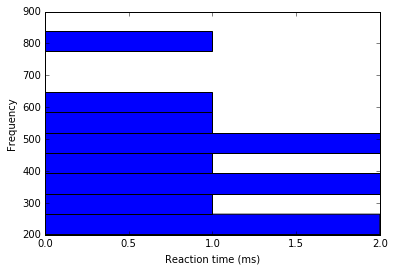

In [84]:
plt.hist(reactions_np, orientation='horizontal');
plt.xlabel('Reaction time (ms)')
plt.ylabel('Frequency')

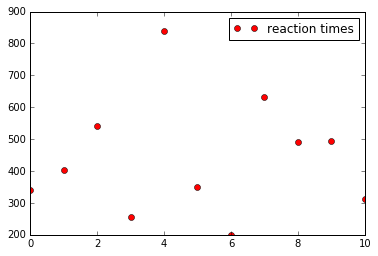

In [93]:
plt.plot(reactions_np, 'ro', label='reaction times')
plt.legend();

Note the `;` at the end of the plot statement above: it stops the statement from returning and so the `[<matplotlib.lines.Line2D at 0xb64b0b8>]` is not displayed.

In [79]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    An arbitrary number of *x*, *y*, *fmt* groups can be
    specified, as in::
    
        a.plot(x1, y1, 'g^', x2, y2, 'g-')
    
    Return value is a list of lines that were added.
    
    By default, each line is assigned a different color specified by a
    'color cycle'.  To change this behavior, you can 

 * Other useful functions (see below)
 * Try it out!

## Plotting a function

 * Let’s say you want to plot the function (in the math sense) $f (x) = 2x^2 + 3$ for $x$ in the range $[−3, 3]$. How would you do it?

3
21
21


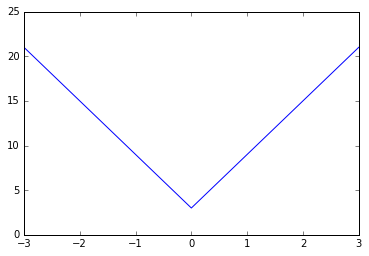

In [58]:
# Define a Python function that computes the function value
def f(x):
    return 2*x**2 + 3

print(f(0))
print(f(-3))
print(f(3))

plt.plot([-3, 0, 3], [f(-3), f(0), f(3)]);

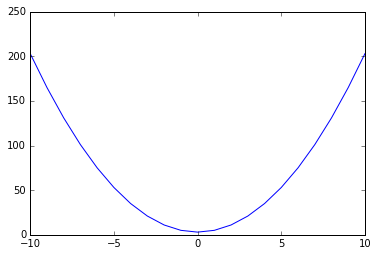

In [65]:
x = np.arange(-10,11)
plt.plot(x,[f(i) for i in x])

 * Wouldn’t it be nice if we could just write `plt.plot(x,2*x**2)`?

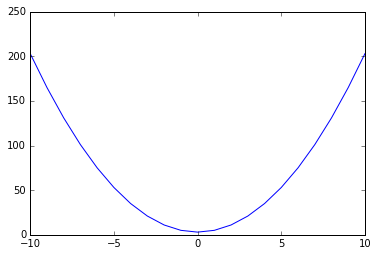

In [66]:
plt.plot(x, 2*x**2 + 3);

 * Oh, wait, we can!
 * What is going on? The magic here is that `arange` and `linspace` does not return a list like `range`, but a `numpy.ndarray`.
 * If we try it with a list, it doesn’t work

In [12]:
xs = range(-3,4)
plt.plot(xs, 2*xs**2 + 3)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

## The *ndarray* type

 * The *numpy.ndarray* type represents a multidimensional, homogeneous array of fixed-size items
 * You can think of this as a table, where each cell is of the same type and is indexed by a tuple of integer indices
 * Vectors (1-D) and matrices (2-D) are the most common examples, but higher-dimensional arrays are also often useful
 * For example, you can represent a video as a 4-D array (x, y, frame, channel)

 * A 1-D ndarray is similar to a list of numbers
 * However it makes it very easy to apply the same (mathematical) operation to all elements in the array
 * They also make it very easy to compute aggregates, like sums, means, products, sum-products, etc.

In [67]:
r = np.arange(1,4,1)
print("r=", r)
print(3*r + 2)
print(np.sqrt(r)) 

print(np.sum(r))
print(np.mean(r))
print(np.prod(r))

r= [1 2 3]
[ 5  8 11]
[ 1.          1.41421356  1.73205081]
6
2.0
6


 * *ndarray* objects have two important attributes:
  * The *data type* (*dtype*) of the objects in the cells
  * The *shape* of the array, describing the dimensionality and the size of the individual dimensions

In [68]:
a = np.zeros(shape = (3, 5), dtype = np.int64)

print("a=", a)
print(type(a)) 

print(a.dtype)
print(a.shape)

a [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
<class 'numpy.ndarray'>
int64
(3, 5)


## Data types

 * Numpy provides a range of data types
  * floating point data types: `float32`, `float64`
  * integer data types: `int64`, `int32`, . . . , `uint8`
  * object data type: object – any Python object
 * Unless you are sure you need something else, use `float64`. This is the default data type in numpy.
 * Exceptions to this rule:
  * use `int32`, `int64` when you need to store (large) integers (e.g. counts)
  * use objects when you need to store other Python objects (dicts, lists, etc.)

### Accessing Elements

 * Access to the individual elements is done using the familiar
[] syntax
 * assign values to individual elements

### Creating arrays

 * Arrays can be created in various ways:
  * from (nested) list objects (using *array*) by creating an empty array and then assigning values (using *empty*/*zeros*) - 1D, 2D
  * using built-in functions for special arrays (*ones*, *eye*, *rand*, *randn*, . . . )

In [69]:
a=np.array([3,2,1,2])
a

array([3, 2, 1, 2])

In [70]:
b=np.array([2.0,4.1,3.14])
b

array([ 2.  ,  4.1 ,  3.14])

In [71]:
c=np.array([[3,1,2], [2,3,4]])
c

array([[3, 1, 2],
       [2, 3, 4]])

 * Note that numpy tries to guess the data type:

In [72]:
print(a.dtype)
print(b.dtype)

int64
float64


 * We can force a particular data type by providing a dtype

In [73]:
a = np.array([3,2,1,2], dtype=np.float64)
print(a.dtype)
print(a)

float64
[ 3.  2.  1.  2.]


### Creating special arrays

 * Numpy provides various functions for creating useful special arrays. The most common ones are:
  * `zeros` – create an array filled with zeros
  * `ones` – create an array filled with ones
  * `empty` – create an array, but don’t initialize it’s elements.
  * `arange` – similar to range
  * `eye` – identity matrix of a given size
  * `random.rand`, `random.randn` – random arrays (uniform, normal)

In [27]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [28]:
np.ones((2,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [29]:
np.empty((2,3))

array([[  2.56808920e-316,   2.56809196e-316,   2.56809473e-316],
       [  2.56809750e-316,   2.56810026e-316,   2.56810303e-316]])

In [30]:
np.arange(5,10)

array([5, 6, 7, 8, 9])

In [31]:
np.eye(2)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [32]:
np.random.rand(2,3)

array([[ 0.31436232,  0.90153585,  0.37472228],
       [ 0.07875608,  0.34302848,  0.62666036]])

In [33]:
np.random.randn(2,3)

array([[ 0.23023132, -0.60236058,  0.70351169],
       [ 1.76881097,  1.54750863, -0.67678484]])

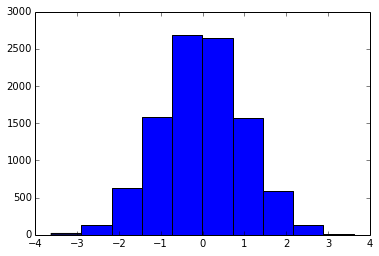

In [34]:
plt.hist(np.random.randn(10000));

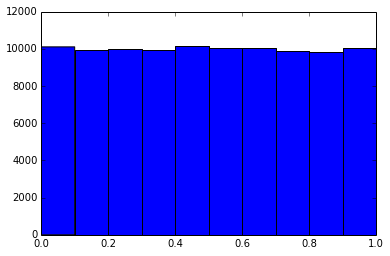

In [35]:
plt.hist(np.random.rand(100000));

### Dimensionality/ Subarrays

 * Numpy arrays support the slice notation familiar from strings and lists
 * Can be used to index contiguous sub-arrays

In [36]:
a = np.eye(3)
print a

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [37]:
a[0,:]

array([ 1.,  0.,  0.])

In [38]:
a[0:2,0:2]

array([[ 1.,  0.],
       [ 0.,  1.]])

In [39]:
a[1:2,0:2]

array([[ 0.,  1.]])

In [40]:
a[0:1,:]

array([[ 1.,  0.,  0.]])

 * We can also assign new values to a subarray

In [41]:
print a

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [42]:
a[0:2,0:2] = 5
print a

[[ 5.  5.  0.]
 [ 5.  5.  0.]
 [ 0.  0.  1.]]


In [43]:
a[1:3,1:3] = np.ones((2, 2))
print a

[[ 5.  5.  0.]
 [ 5.  1.  1.]
 [ 0.  1.  1.]]


### Accessing Subarrays – Boolean indexing

* Comparison operatorions on arrays return boolean arrays of the same size

In [44]:
a=np.eye(2)

In [45]:
a == 1

array([[ True, False],
       [False,  True]], dtype=bool)

In [46]:
a > 0

array([[ True, False],
       [False,  True]], dtype=bool)

In [47]:
a<=0

array([[False,  True],
       [ True, False]], dtype=bool)

 * These boolean arrays can then be used for indexing the original array

In [48]:
a=np.eye(2)
print a

[[ 1.  0.]
 [ 0.  1.]]


In [49]:
a[a == 1]

array([ 1.,  1.])

In [50]:
a[a == 1] = 2
print a

[[ 2.  0.]
 [ 0.  2.]]


### Elementwise operations

 * Numpy contains many standard mathematical functions that operate elementwise on arrays
 * These are called universal functions (ufuncs)
 * Included are things like *add*, *multiply*, *log*, *exp*, *sin*, . . .
 * See http://docs.scipy.org/doc/numpy/reference/ufuncs.html
 * These are very fast (in constrast to doing the same by loops)

In [99]:
a = np.ones((2,2))*2
a

array([[ 2.,  2.],
       [ 2.,  2.]])

In [100]:
np.add(a,a)

array([[ 4.,  4.],
       [ 4.,  4.]])

In [101]:
a * a

array([[ 4.,  4.],
       [ 4.,  4.]])

In [102]:
np.log(a)

array([[ 0.69314718,  0.69314718],
       [ 0.69314718,  0.69314718]])

The alternative - implementing it by hand - is *very* slow (for large arrays). Don't do this:

In [103]:
result=np.empty(a.shape)
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        result[i,j]=a[i,j]*2
        
print(result)

[[ 4.  4.]
 [ 4.  4.]]


### Broadcasting

 * Broadcasting is how numpy handles operations between arrays of different, but compatible shapes
 * For example, you might want to add a column vector to all columns of a matrix

In [104]:
a = np.ones((2,2))
b = 2*np.ones((2,1))
print("a=", a)
print("b=", b)
print("a+b = ", a + b)

a= [[ 1.  1.]
 [ 1.  1.]]
b= [[ 2.]
 [ 2.]]
a+b =  [[ 3.  3.]
 [ 3.  3.]]


In [57]:
a = np.ones((3,2))
b = np.array([4,5])
print "a:", a.shape
print a
print "b:", b.shape
print b

a: (3L, 2L)
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
b: (2L,)
[4 5]


In [58]:
print a+b

[[ 5.  6.]
 [ 5.  6.]
 [ 5.  6.]]


In [59]:
print a* b

[[ 4.  5.]
 [ 4.  5.]
 [ 4.  5.]]


 ###  reductions of an array:  `sum`, `prod`, `mean`, `cumsum`

In [64]:
np.sum(a)

[[1 2]
 [3 4]]


In [65]:
np.prod(a)

24

In [66]:
np.mean(a)

2.5

In [67]:
np.mean(a,0)

array([ 2.,  3.])

In [68]:
np.cumsum(a)

array([ 1,  3,  6, 10])

 * See http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#calculation

### Vector/Matrix operations

* Many algorithms in scientific computing can be cast in a form that makes use of only a few linear algebra primitves.
* Probably the most common such primitives are the **dot-product** between vectors, matrix-vector products, as well as **matrix-matrix products**.
* The product between a matrix $A$ of size $M \times N$ and a matrix
$B$ of size $N \times K$, written as $\langle A, B \rangle$ or just $AB$ is defined as
$$(AB)_{ij} :=\sum_k A_{ik} B_{kj}$$

 * Numpy uses a single functions for all these operations: **`dot`**, both for arrays and matrices:

In [105]:
a = np.ones(2)*3
a

array([ 3.,  3.])

In [106]:
b = np.array([[1,2]]).T
b

array([[1],
       [2]])

In [107]:
A = np.random.rand(2,2)
A

array([[ 0.49265986,  0.49878736],
       [ 0.38176768,  0.27121722]])

In [108]:
np.dot(a,A)

array([ 2.62328263,  2.31001375])

In [109]:
np.dot(A,b)

array([[ 1.49023458],
       [ 0.92420213]])

In [119]:
np.dot(b.T,a)

array([ 9.])

## Scipy Overview

* SciPy is large collection of (sub-)packages that contains a variety of functions that are useful for scientific computing
* Impossible to cover all, check out the documentation and examples at http://wiki.scipy.org/Cookbook
* In particular, there are functions for
  * Special functions (scipy.special)
  * Integration (scipy.integrate)
  * Optimization (scipy.optimize)
  * Interpolation (scipy.interpolate)
  * Fourier Transforms (scipy.fftpack)
  * Signal Processing (scipy.signal)
  * Linear Algebra (scipy.linalg)
  * Statistics (scipy.stats)
  * Multi-dimensional image processing (scipy.ndimage)



## `matplotlib` overview

* a MATLAB style plotting library
  * plot commands are **simple**
  * produces **publication quality** figures
  * See http://matplotlib.sourceforge.net/users/screenshots.html


### problem/idea: 
Plotting requires action at **different levels**


### solution: `matplotlib` code is hierarchical

* top: `matplotlib.pyplot` module
  * **simple functions** that plot simple elements (lines, text) to the current axes of the current figure. 
  * MATLAB-like
  
  
* intermediate: matplotlib API (API? http://www.webopedia.com/TERM/A/API.html)
  * the "frontend" of matplotlib: the actual classes that create figures, text, lines, etc.
  * at this level the `pyplot` module is used only for a few functions e.g to create a figure, whereas most plotting is done via axes objects
  * for customizing your plots. advanced
  * http://matplotlib.org/users/artists.html


* bottom: matplotlib backend
  * e.g. to embed matplotlib plots in GUIs
  * **you don't have to worry about this.** Think of it as the output to the screen.
  * http://matplotlib.org/faq/usage_faq.html#what-is-a-backend
  

# `matplotlib` Gallery

Arguably the most useful page on matplotlib.org is the gallery:

http://matplotlib.org/gallery.html

When you have a plot in mind but don't know how to write the code for it, this is the place to go!

### histograms in 2D

create random x and y values; plot `hist2d`; plot a `colorbar`

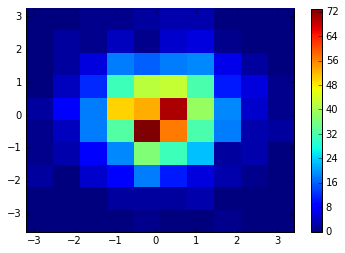

In [120]:
y = np.random.randn(1000)
x = np.random.randn(len(y))

plt.hist2d(x,y)
plt.colorbar()

### pie charts

In [ ]:
time_spent = [4, 10, 7, 1, 0.5]
time_labels = ['work','coffee','commute','email','food']
plt.pie(time_spent, labels=time_labels)

# Advanced Plotting: using the `Artist`

Say you want to display your data in a figure with 2 plots: one with a linear axis, one with a log axis. For this, we need control of the axes of the plot independently ... let's we dive into the frontend matplotlib level.  

![Image Alt](fig_map.png)

from matplotlib.org


`Figure`
  * the **whole** thing. A top-level container where all the other objects (`Axes`, `Axis`, `Artist`) are kept

`Axes`
  * a matplotlib class of functions
  * think of it as the actual plot - the bit of the image that contains your data
  * `Axes` contains `Axis` objects, which are the axes of your plot
  * an important `Axes` method is `set_`, e.g. `set_title()`, `set_xlim()`

`Axis`
  * objects that act as the different axes of your plot
  * set the graph limits, generate ticks
  
`Artist`
  * everything you can see on the figure is an artist object
  * e.g. `Text` objects, `Line2D` objects, etc
  * even the `Figure`, `Axes` and `Axis` objects are artist objects

## Subplots

according to this structure, to plot:

1. generate new figure with pyplot
2. add `Axes`, e.g. with `add_subplot`
3. draw onto the `Axes`, e.g. `ax.plot()`
4. specify properties with `set_`



fig = plt.figure()

ax1 = fig.add_subplot(211)

y = np.random.normal(size=1000)
type(y)
y = y[y > 0]
y.sort()

ax1.plot(y)
ax1.set_ylabel("linear")

ax2 = fig.add_subplot(212)

ax2.plot(y)
ax2.set_ylabel('log')
ax2.set_yscale("log")

fig.savefig("linearlog_figure.eps")

## Plotting in 3D

there's a toolkit in matplotlib for 3D plotting: `mpl_toolkits.mplot3d`. from here import `Axes3D`

make up random numbers

plot a figure, add axes. For 3D rendering, the projection has to be `3d`

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.random.normal(size=30)
y = np.random.normal(size=len(x))
z = np.random.normal(size=len(x))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z, 'ro')

### other Python plotting tools:

#### seaborn: 
http://stanford.edu/~mwaskom/software/seaborn/